In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [2]:
p = QuantumRegister(1, 'p')
q = QuantumRegister(1, 'q')
eq = QuantumRegister(1, 'p = q')
gt = QuantumRegister(1, 'p > q')
lt = QuantumRegister(1, 'p < q')
anc = QuantumRegister(2, 'ancilla')
cp = ClassicalRegister(1, 'cp')
cq = ClassicalRegister(1, 'cq')
ceq = ClassicalRegister(1, 'eq')
cgt = ClassicalRegister(1, 'gt')
clt = ClassicalRegister(1, 'lt')
circ = QuantumCircuit(p, q, eq, gt, lt, anc, cp, cq, ceq, cgt, clt)

In [3]:
circ.h(p)
circ.h(q)
circ.measure(p, cp)
circ.measure(q, cq)
circ.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'p'), 0), Qubit(QuantumRegister(1, 'q'), 0), Qubit(QuantumRegister(1, 'p = q'), 0), Qubit(QuantumRegister(1, 'p > q'), 0), Qubit(QuantumRegister(1, 'p < q'), 0), Qubit(QuantumRegister(2, 'ancilla'), 0), Qubit(QuantumRegister(2, 'ancilla'), 1)), clbits=())

In [4]:
circ.x(q)
circ.ccx(p, q, gt)
circ.x(q)
circ.measure(gt, cgt)
circ.barrier(label='gt')

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'p'), 0), Qubit(QuantumRegister(1, 'q'), 0), Qubit(QuantumRegister(1, 'p = q'), 0), Qubit(QuantumRegister(1, 'p > q'), 0), Qubit(QuantumRegister(1, 'p < q'), 0), Qubit(QuantumRegister(2, 'ancilla'), 0), Qubit(QuantumRegister(2, 'ancilla'), 1)), clbits=())

In [5]:
circ.x(p)
circ.ccx(p, q, lt)
circ.x(p)
circ.measure(lt, clt)
circ.barrier(label='lt')

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'p'), 0), Qubit(QuantumRegister(1, 'q'), 0), Qubit(QuantumRegister(1, 'p = q'), 0), Qubit(QuantumRegister(1, 'p > q'), 0), Qubit(QuantumRegister(1, 'p < q'), 0), Qubit(QuantumRegister(2, 'ancilla'), 0), Qubit(QuantumRegister(2, 'ancilla'), 1)), clbits=())

In [6]:
circ.ccx(p, q, anc[0])
circ.x(p)
circ.x(q)
circ.ccx(p, q, anc[1])
circ.x(p)
circ.x(q)
circ.x(anc)
circ.ccx(anc[0], anc[1], eq)
circ.x(eq)
circ.x(anc)
circ.measure(eq, ceq)
circ.barrier(label='eq')

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=7, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'p'), 0), Qubit(QuantumRegister(1, 'q'), 0), Qubit(QuantumRegister(1, 'p = q'), 0), Qubit(QuantumRegister(1, 'p > q'), 0), Qubit(QuantumRegister(1, 'p < q'), 0), Qubit(QuantumRegister(2, 'ancilla'), 0), Qubit(QuantumRegister(2, 'ancilla'), 1)), clbits=())

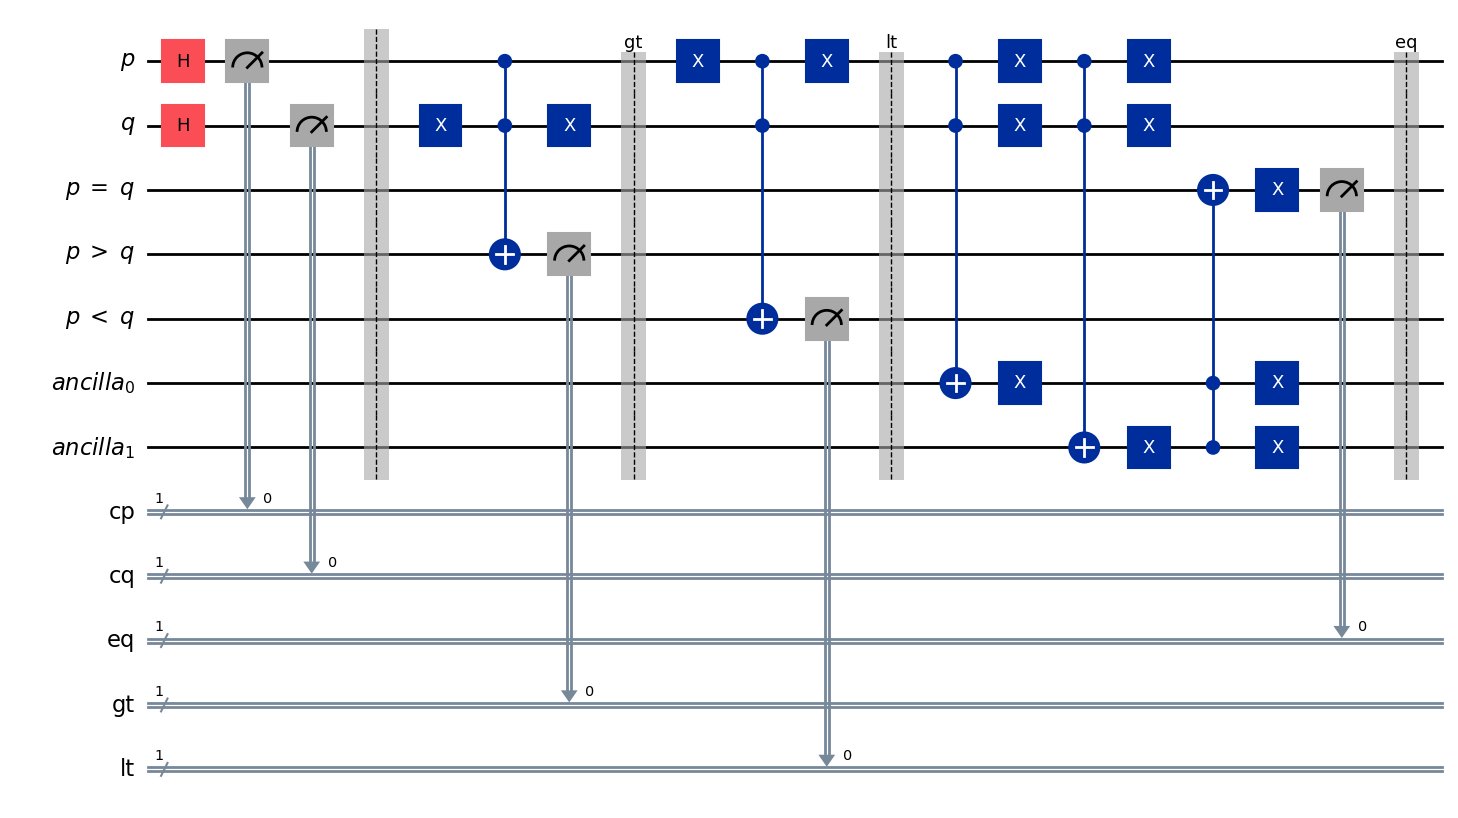

In [7]:
from qiskit.visualization import circuit_drawer
circuit_drawer(circ, output='mpl', fold=-1)

In [8]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

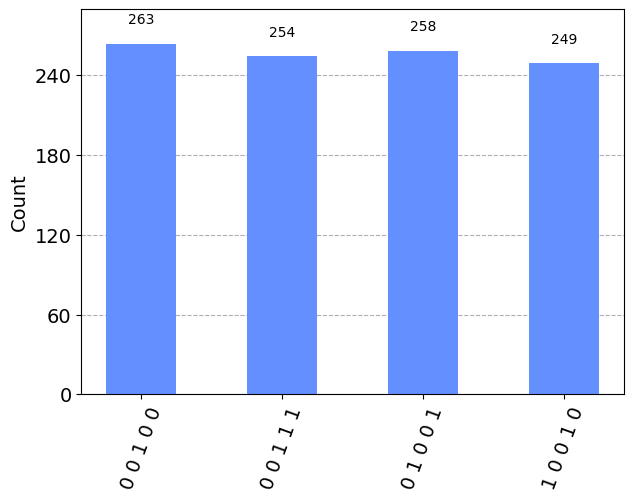

In [9]:
backend = Aer.get_backend('qasm_simulator')
results = backend.run(circ).result()
plot_histogram(results.get_counts())